#2. Multiclass Logistic Regression for the MNIST

In [1]:
pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7917 sha256=8a6aaa95a888412f196d8d5c5dd77bccd605d96757c28b1680fe6c9012922b65
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy


In [2]:
#importing libraries
import idx2numpy 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#importing MNIST dataset
MNIST_Data_train=idx2numpy.convert_from_file('/content/train-images.idx3-ubyte')
MNIST_Data_train_Labels=idx2numpy.convert_from_file('/content/train-labels.idx1-ubyte')
MNIST_Data_test=idx2numpy.convert_from_file('/content/t10k-images.idx3-ubyte')
MNIST_Data_test_Labels=idx2numpy.convert_from_file('/content/t10k-labels.idx1-ubyte')


In [4]:
MNIST_Data_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
MNIST_Data_train_Labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
MNIST_Data_train_Labels.shape

(60000,)

In [7]:
MNIST_Data_train.shape

(60000, 28, 28)

In [8]:
MNIST_Data_test_Labels.shape

(10000,)

In [9]:
MNIST_Data_test.shape

(10000, 28, 28)

#One-vs-One (OVO) fashion with L2 regularization

In [10]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression



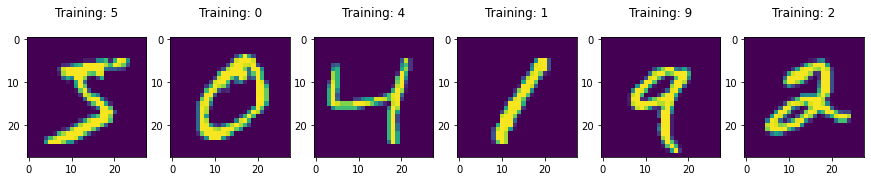

In [11]:

plt.figure(figsize=(15,5))
for index, (image, label) in enumerate(zip(MNIST_Data_train[0:6],MNIST_Data_train_Labels[0:6])):
 plt.subplot(1, 6, index + 1)
 plt.imshow(np.reshape(image, (28,28)))
 plt.title('Training: %i\n' % label)

In [12]:
MNIST_Data_train=MNIST_Data_train.reshape(MNIST_Data_train.shape[0], -1)

In [13]:
MNIST_Data_test=MNIST_Data_test.reshape((MNIST_Data_test.shape[0], -1))

In [14]:
model = OneVsOneClassifier(LogisticRegression(random_state=0, penalty='l2', max_iter=500)) #building model using l2 regularization

In [15]:
model.fit(MNIST_Data_train,MNIST_Data_train_Labels  )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


OneVsOneClassifier(estimator=LogisticRegression(max_iter=500, random_state=0))

In [16]:
ypred = model.predict(MNIST_Data_test)


In [17]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [18]:
test_accuracy = accuracy_score(MNIST_Data_test_Labels, ypred)
print("The Accuracy for Test Set is {}".format(test_accuracy*100))

The Accuracy for Test Set is 92.57


In [19]:
#generating classification report
from sklearn.metrics import classification_report
print(classification_report(MNIST_Data_test_Labels,ypred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       980
           1       0.98      0.97      0.98      1135
           2       0.92      0.91      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.87      0.88      0.87       892
           6       0.96      0.94      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.86      0.90      0.88       974
           9       0.90      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



#One-vs-Rest (OVR) fashion with L2 regularization

In [20]:
Model = OneVsRestClassifier(LogisticRegression(random_state=0, penalty='l2', max_iter=500), n_jobs=2) #building the model using l2 regularization

In [21]:
Model.fit(MNIST_Data_train,MNIST_Data_train_Labels  )#fitting

OneVsRestClassifier(estimator=LogisticRegression(max_iter=500, random_state=0),
                    n_jobs=2)

In [22]:
Ypred = model.predict(MNIST_Data_test)

In [23]:
Test_accu = accuracy_score(MNIST_Data_test_Labels, Ypred)
print("The Accuracy for Test Set is {}".format(Test_accu*100))

The Accuracy for Test Set is 92.57


In [24]:
#generating classification report
from sklearn.metrics import classification_report
print(classification_report(MNIST_Data_test_Labels,Ypred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       980
           1       0.98      0.97      0.98      1135
           2       0.92      0.91      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.87      0.88      0.87       892
           6       0.96      0.94      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.86      0.90      0.88       974
           9       0.90      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



#One-vs-One (OVO) fashion , Simple Logistic regression

In [25]:
model_L = OneVsOneClassifier(LogisticRegression(random_state=0, max_iter=500)) 

In [26]:
model_L.fit(MNIST_Data_train,MNIST_Data_train_Labels  )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


OneVsOneClassifier(estimator=LogisticRegression(max_iter=500, random_state=0))

In [27]:
Y_pred = model_L.predict(MNIST_Data_test)

In [28]:
test_accuracy = accuracy_score(MNIST_Data_test_Labels, Y_pred)
print("The Accuracy for Test Set is {}".format(test_accuracy*100))

The Accuracy for Test Set is 92.57


In [29]:
#generating classification report
from sklearn.metrics import classification_report
print(classification_report(MNIST_Data_test_Labels,ypred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       980
           1       0.98      0.97      0.98      1135
           2       0.92      0.91      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.87      0.88      0.87       892
           6       0.96      0.94      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.86      0.90      0.88       974
           9       0.90      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



#One-vs-Rest (OVR) fashion , Simple Logistic regression

In [30]:
Model_L = OneVsOneClassifier(LogisticRegression(random_state=0, max_iter=500)) 

In [31]:
Model_L.fit(MNIST_Data_train,MNIST_Data_train_Labels  )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


OneVsOneClassifier(estimator=LogisticRegression(max_iter=500, random_state=0))

In [32]:
y_pred = model_L.predict(MNIST_Data_test)

In [33]:
Test_accura = accuracy_score(MNIST_Data_test_Labels, y_pred)
print("The Accuracy for Test Set is {}".format(Test_accura*100))

The Accuracy for Test Set is 92.57


In [34]:
#generating classification report
from sklearn.metrics import classification_report
print(classification_report(MNIST_Data_test_Labels,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       980
           1       0.98      0.97      0.98      1135
           2       0.92      0.91      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.87      0.88      0.87       892
           6       0.96      0.94      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.86      0.90      0.88       974
           9       0.90      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000

